In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read three datasets
dfResults = pd.read_csv('../data/project/results.csv')

# Crear la nueva columna 'winner'
conditions = [
    dfResults['home_score'] > dfResults['away_score'],
    dfResults['away_score'] > dfResults['home_score'],
    dfResults['home_score'] == dfResults['away_score']
]

choices = [
    dfResults['home_team'],
    dfResults['away_team'],
    'Draw'
]

dfResults['winner'] = np.select(conditions, choices)

dfResults

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Draw
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


In [110]:
dfResults.drop_duplicates(inplace=True)

dfResults

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland
...,...,...,...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,CONCACAF Nations League,San Cristóbal,Dominican Republic,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,CONCACAF Nations League,Bridgetown,Barbados,True,Draw
44554,2023-03-28,Bonaire,Turks and Caicos Islands,1,2,CONCACAF Nations League,Rincon,Bonaire,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,CONCACAF Nations League,Saint Croix,United States Virgin Islands,False,Sint Maarten


In [111]:
dfResults.drop(['tournament', 'city', 'country'], axis=1, inplace=True)
dfResults.dropna(inplace=True)

In [112]:
dfResults['home_team'] = dfResults['home_team'].str.strip()
dfResults['away_team'] = dfResults['away_team'].str.strip()
dfResults['home_team'] = dfResults['home_team'].str.title()
dfResults['away_team'] = dfResults['away_team'].str.title()

dfResults

,date,home_team,away_team,home_score,away_score,neutral,winner
0,1872-11-30,Scotland,England,0,0,False,Draw
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
3,1875-03-06,England,Scotland,2,2,False,Draw
4,1876-03-04,Scotland,England,3,0,False,Scotland
...,...,...,...,...,...,...,...
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44553,2023-03-28,Guyana,Montserrat,0,0,True,Draw
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands
44555,2023-03-28,United States Virgin Islands,Sint Maarten,1,2,False,Sint Maarten


In [113]:
dfResults['home_score'] = dfResults['home_score'].astype(int)
dfResults['away_score'] = dfResults['away_score'].astype(int)


In [130]:
# Eliminar filas con empate
dfResults.drop(index=dfResults[dfResults['winner'] == 'Draw'].index, inplace=True)

dfResults

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
4,1876-03-04,Scotland,England,3,0,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,False,Scotland
6,1877-03-03,England,Scotland,1,3,False,Scotland
...,...,...,...,...,...,...,...
44550,2023-03-28,Costa Rica,Panama,0,1,False,Panama
44551,2023-03-28,Canada,Honduras,4,1,False,Canada
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands


In [131]:
# Eliminar filas con más de 5 goles
dfResults.drop(index=dfResults[(dfResults['home_score'] > 5) | (dfResults['away_score'] > 5)].index, inplace=True)

dfResults

,date,home_team,away_team,home_score,away_score,neutral,winner
1,1873-03-08,England,Scotland,4,2,False,England
2,1874-03-07,Scotland,England,2,1,False,Scotland
4,1876-03-04,Scotland,England,3,0,False,Scotland
5,1876-03-25,Scotland,Wales,4,0,False,Scotland
6,1877-03-03,England,Scotland,1,3,False,Scotland
...,...,...,...,...,...,...,...
44550,2023-03-28,Costa Rica,Panama,0,1,False,Panama
44551,2023-03-28,Canada,Honduras,4,1,False,Canada
44552,2023-03-28,Haiti,Bermuda,3,1,True,Haiti
44554,2023-03-28,Bonaire,Turks And Caicos Islands,1,2,False,Turks and Caicos Islands


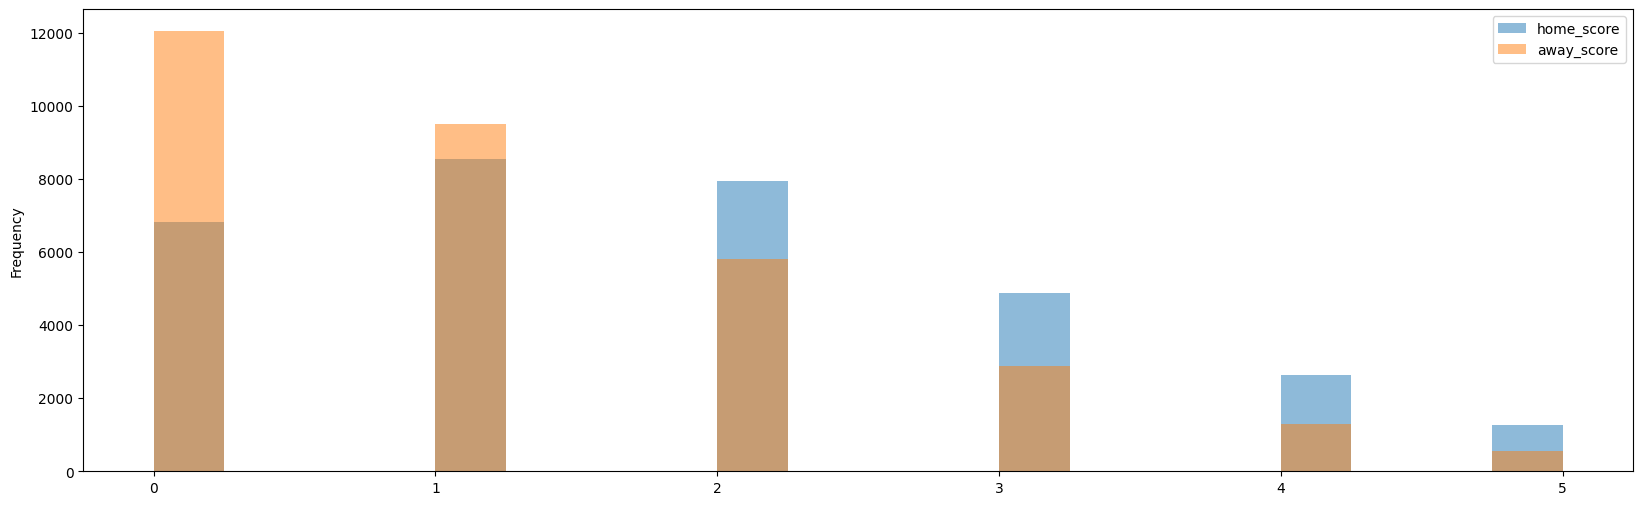

In [132]:
# Histograma de puntajes de equipos
dfResults[['home_score', 'away_score']].plot.hist(bins=20, alpha=0.5, figsize=(20, 6))
plt.show()

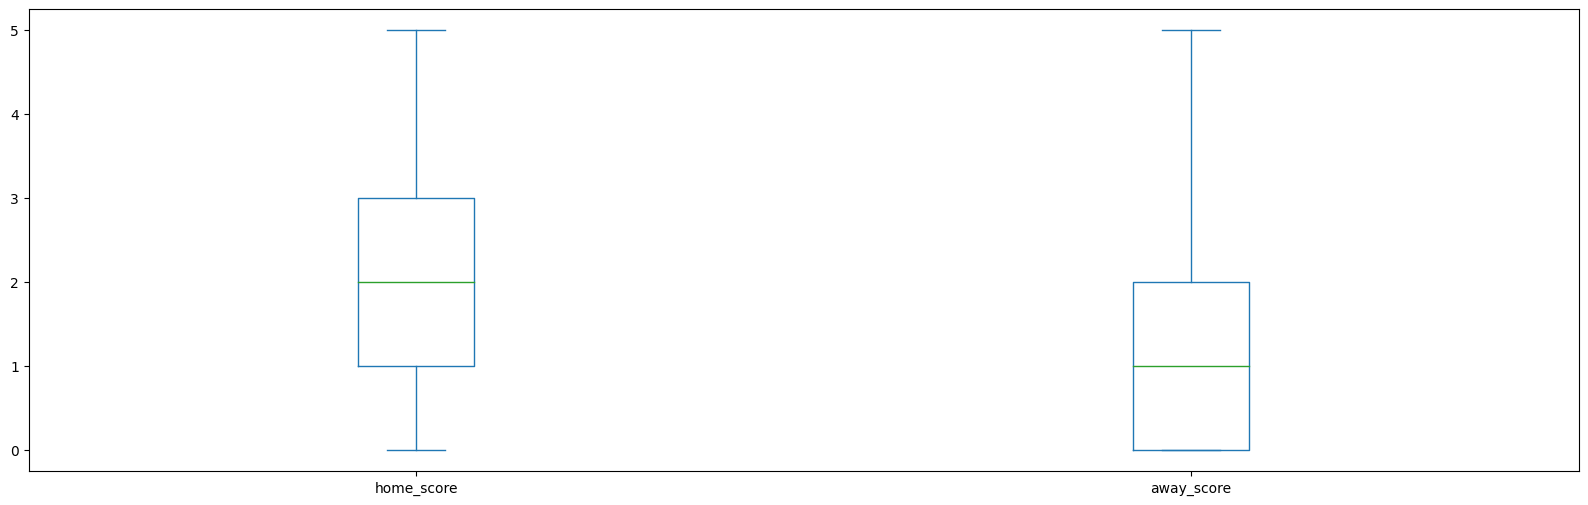

In [133]:
# Diagrama de caja de puntajes de equipos
dfResults[['home_score', 'away_score']].plot.box(figsize=(20, 6))
plt.show()

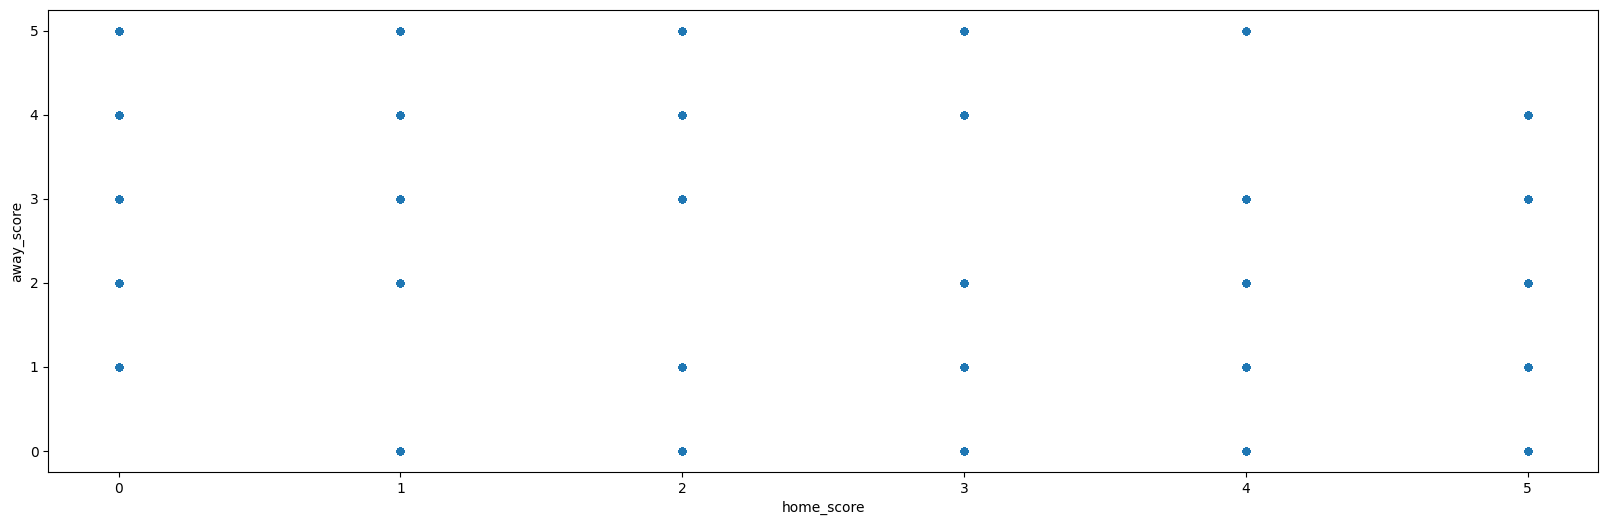

In [134]:
# Gráfico de dispersión de puntajes de equipos
dfResults.plot.scatter(x='home_score', y='away_score', figsize=(20, 6))
plt.show()

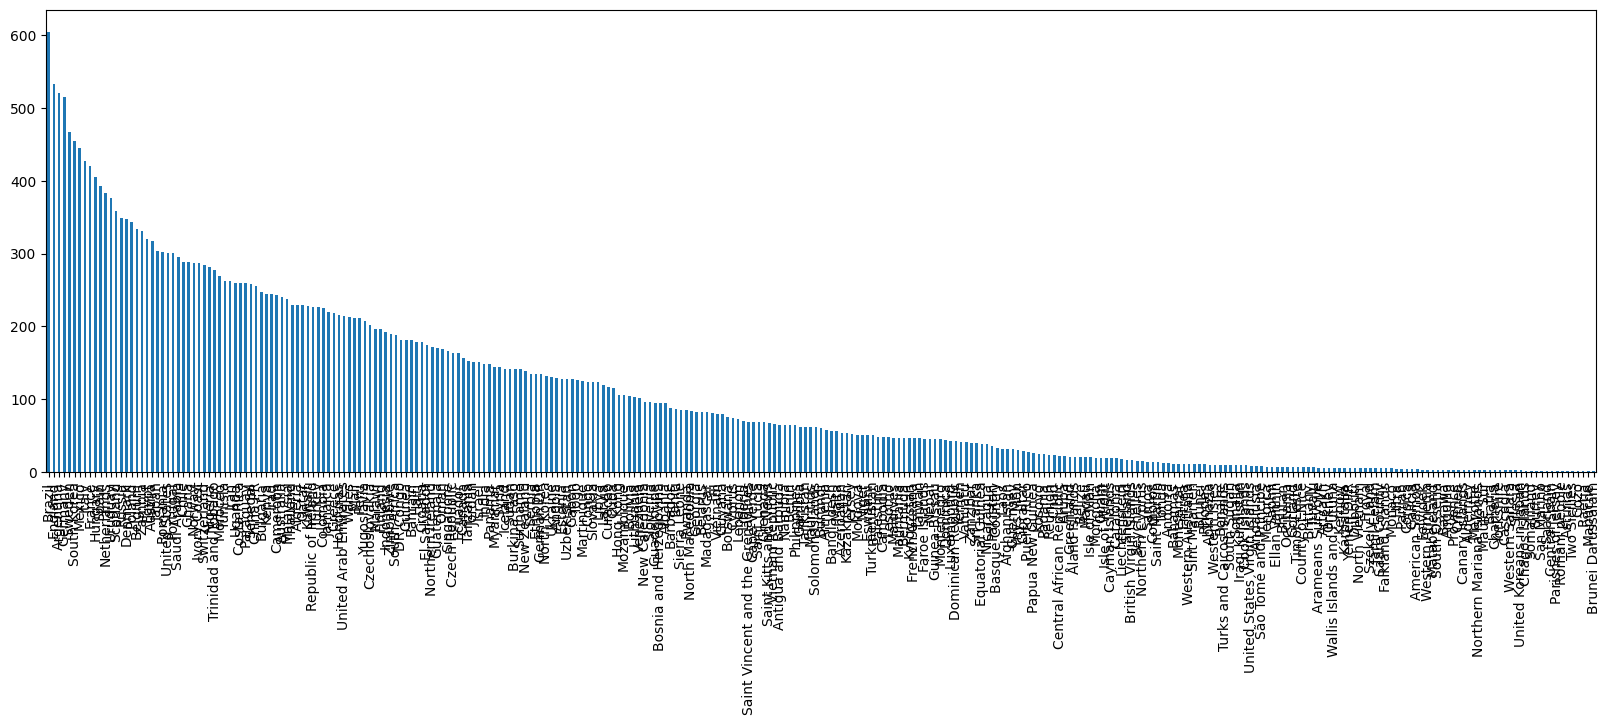

In [135]:
# Gráfico de barras de ganadores
dfResults['winner'].value_counts().plot.bar(figsize=(20, 6))
plt.show()